HUMZA HUMAYUN - DATA 3421 LAB 1

First, try to understand your data by creating initial visualizations, checking data types, and
identifying any errors or inconsistencies in your dataset. Then, proceed to answer the following
questions:

1. Imputation Techniques Comparison:
● Implement and compare different imputation techniques, including mean, median, and
mode/frequent category imputation for handling missing values. Assess the impact of each
technique on the dataset.
● Evaluate how the imputation of missing values affects the variance and distribution of the
involved variables.

2. Encoding Categorical Variables:
● Discuss different methods for encoding categorical variables like 'Genre'. Which method would
be most appropriate and why?

3. Data Transformation Methods:
● Identify and describe different data transformation methods that could be applied to this dataset.
How would these methods help in making the dataset more suitable for analysis?

4. Outlier Identification and Handling:
● Find and discuss the outliers present in the dataset. What methods would you use to handle these
outliers?

5. Handling Missing Values:
● Explore and discuss different strategies for handling missing values in the dataset. Which strategy
would be most effective for each type of missing data?

6. Feature Engineering
● Can you create a new feature, such as Profit Margin (Sales Revenue - Budget)?

In [4]:
#basal data understanding - translating to DF and and primary analysis of raw CSV:
import pandas as pd
movies_lists=pd.read_csv("movie.csv")
movies_lists.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [5]:
movies_lists.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [7]:
movies_lists.dtypes

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object

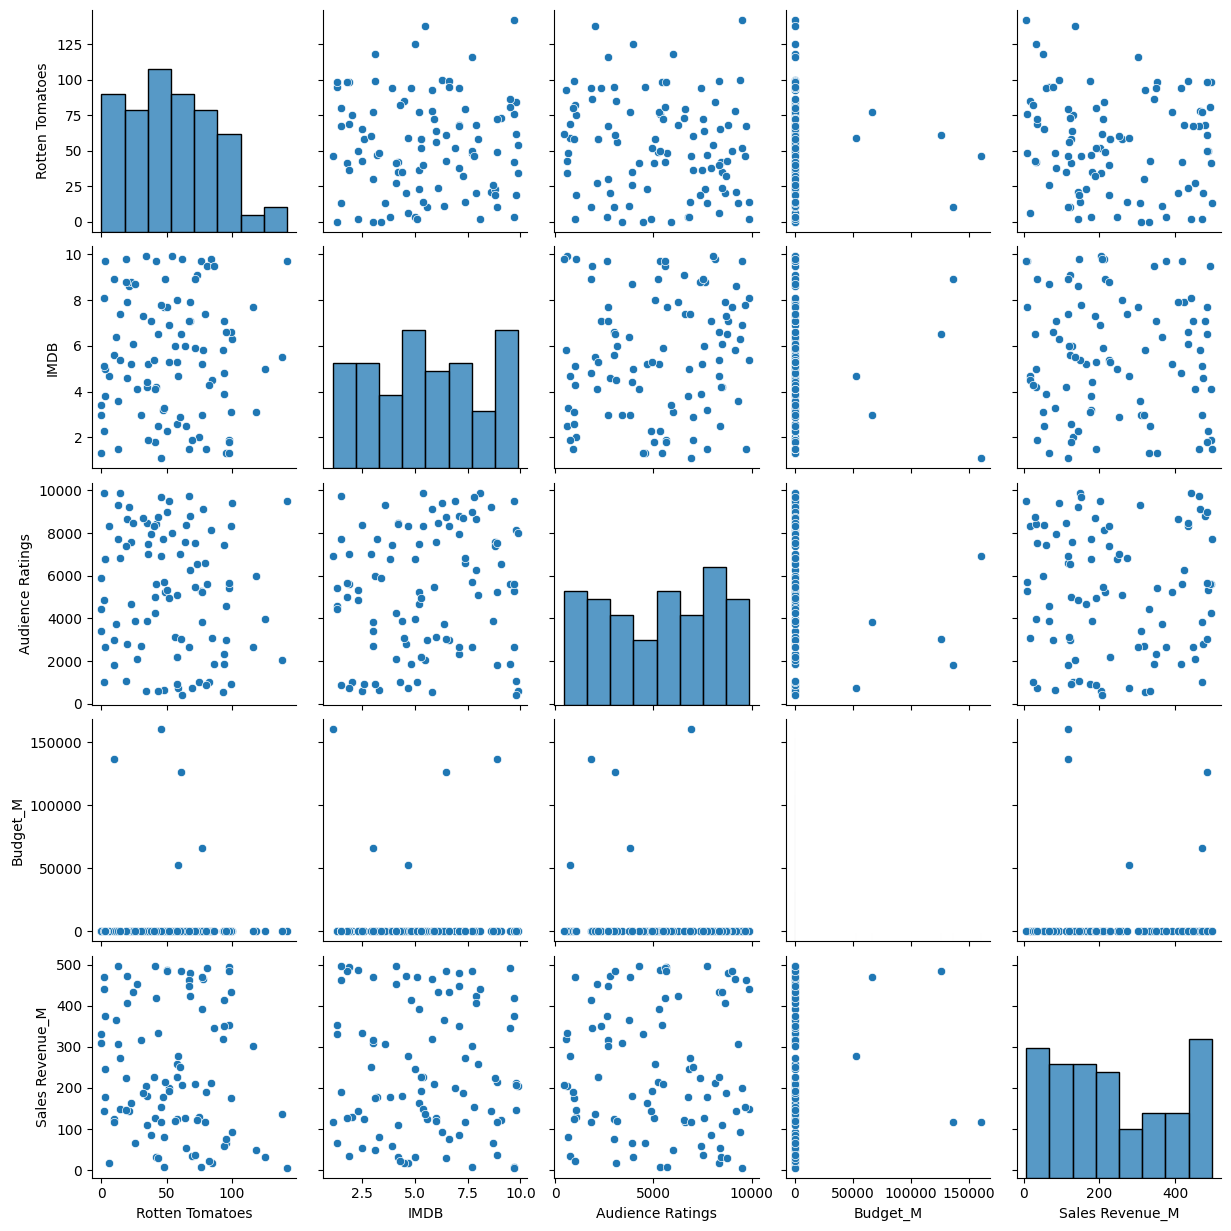

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(movies_lists)
plt.show()

In [16]:
#detecting erraneous and detrimental data - outliers, missing values, duplicates, and such:

#print(movies_lists.duplicated()) This command DETECTS from entire DF
dupes=(movies_lists[movies_lists.duplicated()]) #this one filters the DF and returns a subset of it with dupes
dupes #the resulting subset of the df is the actual duplicate and it's position

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
100,Action,58,5.3,2195,47.214594,227.081198,1998


In [22]:
missing=(movies_lists[movies_lists.isnull().any(axis=1)])
missing

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
31,Horror,36,1.9,7034,27.165077,NaN,1986
45,Sci-Fi,23,8.8,7601,155.704105,NaN,2003
64,Romance,36,5.2,7468,107.699321,NaN,1981
73,Action,54,9.9,8015,91.925373,NaN,2010
74,Horror,0,3.4,5896,176.526241,NaN,2008


In [29]:
#1 - imputation techniques:
mean_imputed = movies_lists.fillna(movies_lists.mean())
mean_imputed

/tmp/ipykernel_341/3841218473.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_imputed = movies_lists.fillna(movies_lists.mean())


,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012
...,...,...,...,...,...,...,...
96,SciFi,52,5.3,4950,163.289240,191.404030,2019
97,Thriller,67,7.1,2665,32.723478,447.692942,2002
98,Sci-Fi,61,6.5,3057,126150.789400,483.897336,1999
99,Horror,14,7.4,6838,80.288417,273.442451,1985


In [30]:
median_imputed = movies_lists.fillna(movies_lists.median())
median_imputed

/tmp/ipykernel_341/3596376858.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_imputed = movies_lists.fillna(movies_lists.median())


,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012
...,...,...,...,...,...,...,...
96,SciFi,52,5.3,4950,163.289240,191.404030,2019
97,Thriller,67,7.1,2665,32.723478,447.692942,2002
98,Sci-Fi,61,6.5,3057,126150.789400,483.897336,1999
99,Horror,14,7.4,6838,80.288417,273.442451,1985


In [32]:
mode_imputed = movies_lists.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x) #complex!
mode_imputed

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012
...,...,...,...,...,...,...,...
96,SciFi,52,5.3,4950,163.289240,191.404030,2019
97,Thriller,67,7.1,2665,32.723478,447.692942,2002
98,Sci-Fi,61,6.5,3057,126150.789400,483.897336,1999
99,Horror,14,7.4,6838,80.288417,273.442451,1985


#2. Encoding Categorical Variables: Discuss different methods for encoding categorical variables like 'Genre'. 
 Which method would be most appropriate and why?
 
 - The data we are working with doesn't seem to have too many variables, and is mainly populated with numerical data. The only categorical data present is the 'Genre' column in which the data present can be of a select range (given that the erraneous field is fixed) which can be simplified to a numerically encoded range for as many unique genres given. Since there is a limmited range of genres, multiple numerical data columns present (already ENOUGH dimentionality in my opinion), I belive that label encoding is the best method. One-hot encoding will just add unnecessary dimenionality to the dataset, with a bunch of columns for wach genre and a line of 1's and 0's that is just inefficient and inappropriate for a already (merely) complex dataset such as this. Label encoding will just assign a numerical value per genre present (encoding), and then simply cross refrence back/forwards when necessary. It also simplifies I/O for any algorithim or models used afterwards. I do not see ordinality of the genre encoding being an issue as long as the hyhpothetical algorithim just uses the values as a means of sorting instead of assigning hierarchal value to it but I digress.


In [37]:
#label encoding in practice hehe:
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
movies_lists['Genre_LabelEncoded'] = label_encoder.fit_transform(df['Genre'])

ModuleNotFoundError: No module named 'sklearn'

#3. Data Transformation Methods:
 - Identify and describe different data transformation methods that could be applied to this dataset.
 - How would these methods help in making the dataset more suitable for analysis?
 
     For this dataset, as far as I can tell, feature scaling, specifically standardization, is needed as there are various features/variables present that are not similarly scaled (like budget and Rotten Tomato scores). As stated earlier, encoding the categorical variables is absolutely necessary and the best metod would be label encoding. Next, imputation is necessary, as there have been various identified fields with missing and erraneous values. Dimensionality reduction could be a possibility but it really relies on doman knowledge as there are three varibles denoting film ratings but the correlation amongst the source of criticism and box office earnings should be studied and either left in or removed; to each his own.


4. Outlier Identification and Handling:
   
   ● Find and discuss the outliers present in the dataset. What methods would you use to handle these outliers?
       
     To look for outliers, there are multiple ways we can go about it: we can either observe the dataset visually with a graph or such, or we could use statistical inference methods on our data to mathemaatically deduce any low or high outliers; such as mean, median, IQR, normal distribution rules (given the data is in such distribution), and the distance from each quartile. To actually deal with the outliers, we can immediately delete the outliers from the dataset, given that the effect of such isn't consquential to the data analysis. We can also transform the data to help achieve a more normally distributed dataset.
    

In [38]:
#Outlier detection:
movies_lists.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [46]:
q1 = movies_lists.quantile(0.25)
q3 = movies_lists.quantile(0.75)
IQR = q3 - q1


threshold_lower = q1 - 1.5 * IQR
threshold_upper = q3 + 1.5 * IQR

outliers = movies_lists[((movies_lists < threshold_lower) | (movies_lists > threshold_upper))]
print(outliers)


    Genre  Rotten Tomatoes  IMDB  Audience Ratings     Budget_M  \
0     NaN              NaN   NaN               NaN          NaN   
1     NaN              NaN   NaN               NaN          NaN   
2     NaN              NaN   NaN               NaN          NaN   
3     NaN              NaN   NaN               NaN          NaN   
4     NaN              NaN   NaN               NaN          NaN   
..    ...              ...   ...               ...          ...   
96    NaN              NaN   NaN               NaN          NaN   
97    NaN              NaN   NaN               NaN          NaN   
98    NaN              NaN   NaN               NaN  126150.7894   
99    NaN              NaN   NaN               NaN          NaN   
100   NaN              NaN   NaN               NaN          NaN   

     Sales Revenue_M Year of Release  
0                NaN             NaN  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  


/tmp/ipykernel_341/4094587884.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = movies_lists[((movies_lists < threshold_lower) | (movies_lists > threshold_upper))]


5. Handling Missing Values: Explore and discuss different strategies for handling missing values in the dataset. Which strategy would be most effective for each type of missing data?

There are blanks for some fields in the data, thus creating a situation where computations for statistical values are incomplete and incorrect as well as unintentionally biased. Some methods to remedy this would be to completely drop the entries with the missind data fields (one or more that are empty). This method allows you to completely omit the bad data and steer away from having to use averages or some other statistical means of imputing a dummy value into it. Though the first technique avoids this, predicting the value that is missing can be a possibility. In this case, you;ll really need a ton of domain knowledge and a fairly consistent algorithim to match earnings and ratings of film and it's genre - so this is a really big "what if?" situation. 


6. Feature Engineering
    ● Can you create a new feature, such as Profit Margin (Sales Revenue - Budget)?

In [48]:
#feature engineering of the 'profit margin' feature:
movies_lists['Profit Margin'] = movies_lists['Sales Revenue_M'] - movies_lists['Budget_M']
movies_lists['Profit Margin']

0         -42.991861
1         183.772972
2         -35.259396
3         385.739420
4         -86.100164
           ...      
96         28.114790
97        414.969464
98    -125666.892064
99        193.154033
100       179.866604
Name: Profit Margin, Length: 101, dtype: float64

In [51]:
movies_lists

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release,Profit Margin
0,Horror,125,5.0,3968,74.348337,31.356476,2020,-42.991861
1,Romance,84,9.8,8150,28.243154,212.016126,2013,183.772972
2,SciFi,75,2.0,1040,164.601429,129.342033,2017,-35.259396
3,Action,68,7.9,6250,38.779734,424.519154,2019,385.739420
4,Thriller,6,4.7,8356,102.752477,16.652313,2012,-86.100164
...,...,...,...,...,...,...,...,...
96,SciFi,52,5.3,4950,163.289240,191.404030,2019,28.114790
97,Thriller,67,7.1,2665,32.723478,447.692942,2002,414.969464
98,Sci-Fi,61,6.5,3057,126150.789400,483.897336,1999,-125666.892064
99,Horror,14,7.4,6838,80.288417,273.442451,1985,193.154033
